In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("dataset.csv")

In [3]:
df.head(4)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2


In [4]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [6]:
df.shape

(2000, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
# Dataset Duplicate Value Count
duplicated_values_count = len(df[df.duplicated()])

print("Number of duplicated values:", duplicated_values_count)

Number of duplicated values: 0


In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

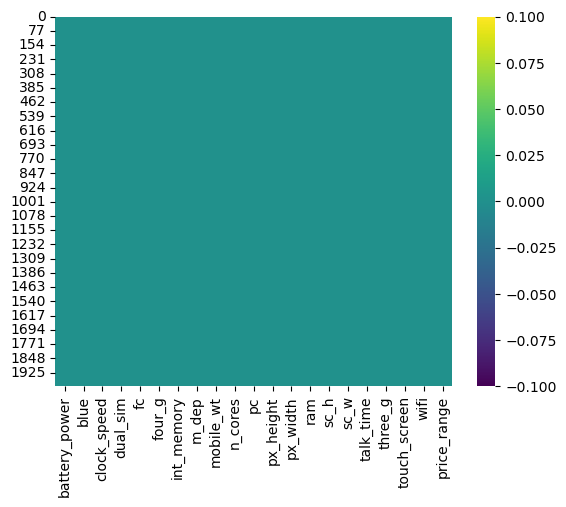

In [10]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=True)

In [11]:
#We can see that in above Heatmap, there is no yellow line, which means that there is no null value

Observations About Dataset

1.The dataset contains 21 columns and 2000 rows

2.No duplicate values present in the dataset.

3.NO missing values present in the dataset.

In [13]:
# Dataset Columns
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
#Length of columns
len(df.columns)
     

21

In [15]:
# Dataset Describe
#Transpose of data Description
df.describe
df.describe().T
     

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


***Description of our data variables:***

Battery_power - Total energy a battery can store in one time measured in mAh.

Blue - Has bluetooth or not.

Clock_speed - speed at which microprocessor executes instructions.

Dual_sim - Has dual sim support or not.

Fc - Front Camera mega pixels.

Four_g - Has 4G or not.

Int_memory - Internal Memory in Gigabytes.

M_dep - Mobile Depth in cm.

Mobile_wt - Weight of mobile phone.

N_cores - Number of cores of processor.

Pc - Primary Camera mega pixels.

Px_height - Pixel Resolution Height.

Px_width - Pixel Resolution Width.

Ram - Random Access Memory in Mega.

Touch_screen - Has touch screen or not.

Wifi - Has wifi or not.

Sc_h - Screen Height of mobile in cm.

Sc_w - Screen Width of mobile in cm.

Talk_time - longest time that a single battery charge will last when you are.

Three_g - Has 3G or not.

Wifi - Has wifi or not.

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(High Cost),3(Very High cost).


In [17]:
# Check Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values for {column}: {unique_values}")

Unique values for battery_power: [ 842 1021  563 ... 1139 1467  858]
Unique values for blue: [0 1]
Unique values for clock_speed: [2.2 0.5 2.5 1.2 1.7 0.6 2.9 2.8 2.1 1.  0.9 1.1 2.6 1.4 1.6 2.7 1.3 2.3
 2.  1.8 3.  1.5 1.9 2.4 0.8 0.7]
Unique values for dual_sim: [0 1]
Unique values for fc: [ 1  0  2 13  3  4  5  7 11 12 16  6 15  8  9 10 18 17 14 19]
Unique values for four_g: [0 1]
Unique values for int_memory: [ 7 53 41 10 44 22 24  9 33 17 52 46 13 23 49 19 39 47 38  8 57 51 21  5
 60 61  6 11 50 34 20 27 42 40 64 14 63 43 16 48 12 55 36 30 45 29 58 25
  3 54 15 37 31 32  4 18  2 56 26 35 59 28 62]
Unique values for m_dep: [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
Unique values for mobile_wt: [188 136 145 131 141 164 139 187 174  93 182 177 159 198 185 196 121 101
  81 156 199 114 111 132 143  96 200  88 150 107 100 157 160 119  87 152
 166 110 118 162 127 109 102 104 148 180 128 134 144 168 155 165  80 138
 142  90 197 172 116  85 163 178 171 103  83 140 194 146 192 106 135 153
  

In [18]:
#Checking Unique Values
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

***DATA WRANGLING***

In [20]:
#now i amperforming data wrangling 
#px_height and sc_w should not be zero so we will check and handle them
#now we will check phones with sc_w=0
sc_w_zero_count = sum(df.sc_w == 0)
print(f"Number of phones with sc_w = 0: {sc_w_zero_count}")

Number of phones with sc_w = 0: 180


In [21]:
#now we will check for phones with px_height=0
px_height_zero_count = sum(df.px_height == 0)
print(f"Number of phones with px_height = 0: {px_height_zero_count}")


Number of phones with px_height = 0: 2


In [22]:
#replacing 0 with mean values
import numpy as np
sc_w_mean = df.sc_w.mean()
px_height_mean = df.px_height.mean()

df.sc_w = np.where(df.sc_w == 0, sc_w_mean, df.sc_w)
df.px_height = np.where(df.px_height == 0, px_height_mean, df.px_height)

# print updated dataframe
print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [23]:
#checking whether there is duplicates or not
len(df[df.duplicated()])

0

In [24]:
#Null values
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

1.I have found that number of phones with pixel resolution height and screen width of mobile in cm are 180 and 2 respectively contains 0 values.

2.The minimum value of px_height and sc_w should not be 0, as it does not make sense for a phone screen width or pixel height to be 0. Therefore, we should check for and handle these cases appropriately to avoid any issues with our analysis.

3.So the 0 values are replaced with the mean values and no missing values left in the table so our data is ready for data analysis!.

***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Chart - 1**

**Price Range**


I picked this chart to know the distribution of percentage of phones with price range low and high

All category phones are distributed with equal price range classes

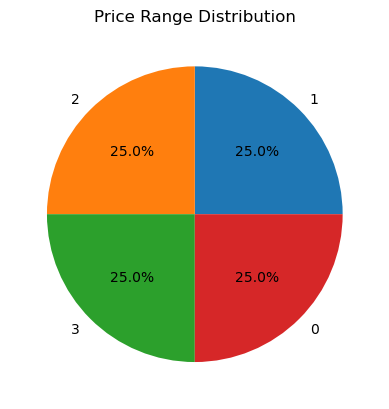

In [28]:

import matplotlib.pyplot as plt
price_counts = df['price_range'].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%')
plt.title('Price Range Distribution')
plt.show()


***CHART 2***


***BATTERY POWER***

This plot visualizes how the battery capacity, measured in mAh, is distributed across the dataset. We can observe that the distribution of battery capacity is positively correlated with the price range of the mobile phones, as there is a gradual increase in the battery capacity as the price range increases. This suggests that there is a strong relationship between the battery capacity and the price of a mobile phone, and that consumers may be willing to pay more for a mobile phone with a higher battery capacity.

The insights gained from analyzing the relationship between the battery capacity and the price of a mobile phone can potentially lead to a positive business impact. If a mobile phone manufacturer is able to produce phones with higher battery capacity at a reasonable cost, they may be able to attract more customers and generate more revenue by offering phones at higher price points.


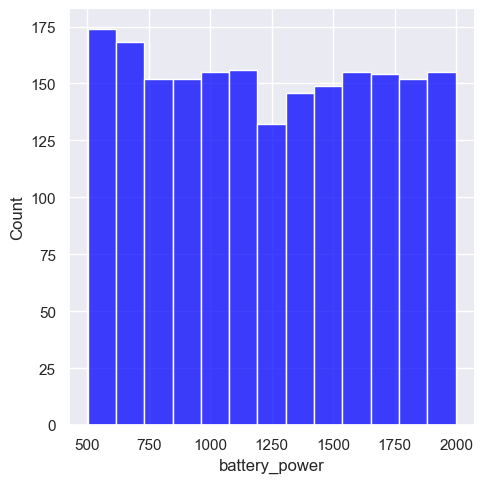

In [30]:
# Chart - 2 visualization code
sns.set(rc={'figure.figsize':(5,5)})
sns.displot(df["battery_power"], color='blue')
plt.show()
     

***CHART 3***

***BLUETOOTH***

This chart shows that half devices support bluetooth and half don't.

Here 0 means nobluetooth and 1 means bluetooth.

The observation that almost half of the devices in the dataset have Bluetooth and half do not could have a positive business impact if a company can leverage this information to improve its products or marketing strategies. For example, a mobile phone manufacturer could use this insight to understand that customers value the presence of Bluetooth in their devices and therefore may prioritize investing in the development of Bluetooth-related features or promoting the presence of Bluetooth in their marketing efforts.

On the other hand, this observation could also have negative consequences if a company misinterprets or misuses this information. For instance, a company might assume that including Bluetooth in their devices is not important because half of the devices in the dataset do not have it. However, this conclusion ignores the fact that many customers still value the presence of Bluetooth in their devices, and a manufacturer that fails to include Bluetooth in their devices could miss out on potential sales and growth opportunitie

Therefore this information should be interpreted carefully.s.

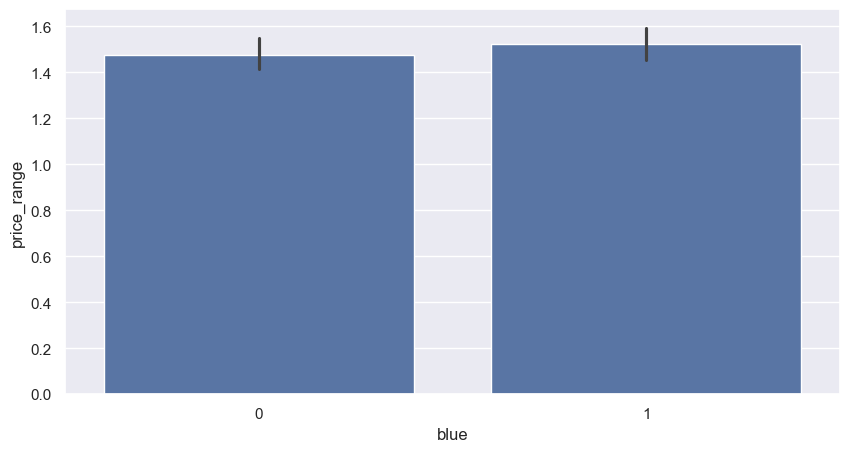

In [32]:

fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=df, x='blue', y='price_range', ax=ax)
plt.show()

***CHART 4***

***RAM***

I used this chart to know price relation with ram.

This suggests that as the price range increases, the amount of RAM in the device generally increases as well.

The insights gained from the scatter plot, such as the positive correlation between RAM and price range, can be valuable for businesses.

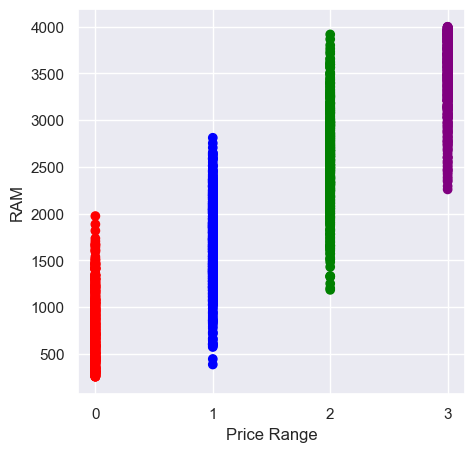

In [34]:
# Create a color map for the points based on price range
colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple'}

# Create the scatter plot
plt.scatter(df['price_range'], df['ram'], c=df['price_range'].apply(lambda x: colors[x]))
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.xticks([0, 1, 2, 3])
plt.show()

***CHART 5***

***DUAL SIM***

I used this chart to know the price according to dual sim availabilty.

We can observe that upto low,medium,high almost it is same but for very high price range it is seen that it is found that the count is raised who using dual devices and count is increasing for dual devices.

We can identify dual sim is actually increasing count or not.

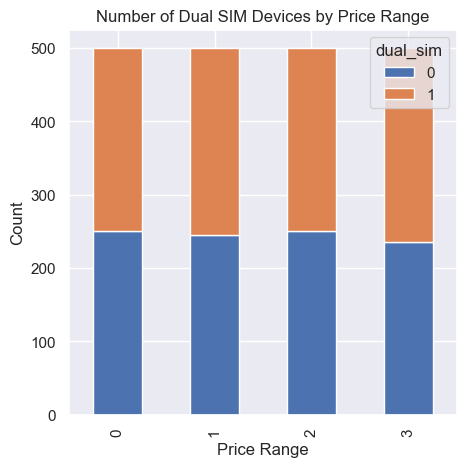

In [36]:
# Group the data by price range and dual sim, and count the number of devices in each group
sim_count = df.groupby(['price_range', 'dual_sim'])['dual_sim'].count()

# Reshape the data into a dataframe with price range as rows, dual sim as columns, and the count as values
sim_count = sim_count.unstack()

# Plot a stacked bar chart of the dual sim count for each price range
sim_count.plot(kind='bar', stacked=True)

# Add axis labels and a title
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Number of Dual SIM Devices by Price Range')

# Show the plot
plt.show()
     

***CHART 6***

***FOUR G***

I used this percentage of 4G sim of mobile phones.

I have found that at low (0), medium (1),very high (3) prices the mobile phones having sim in more numbers but at high(2) prices it is showing slightly collapse.

The insights gained from the analysis of the number of SIM cards in mobile phones at different price ranges can be helpful in creating a positive business impact. For example, if a company wants to introduce a new product in a specific price range, they can use this information to determine whether their target market prefers phones with a single SIM or dual SIM, and adjust their product accordingly.

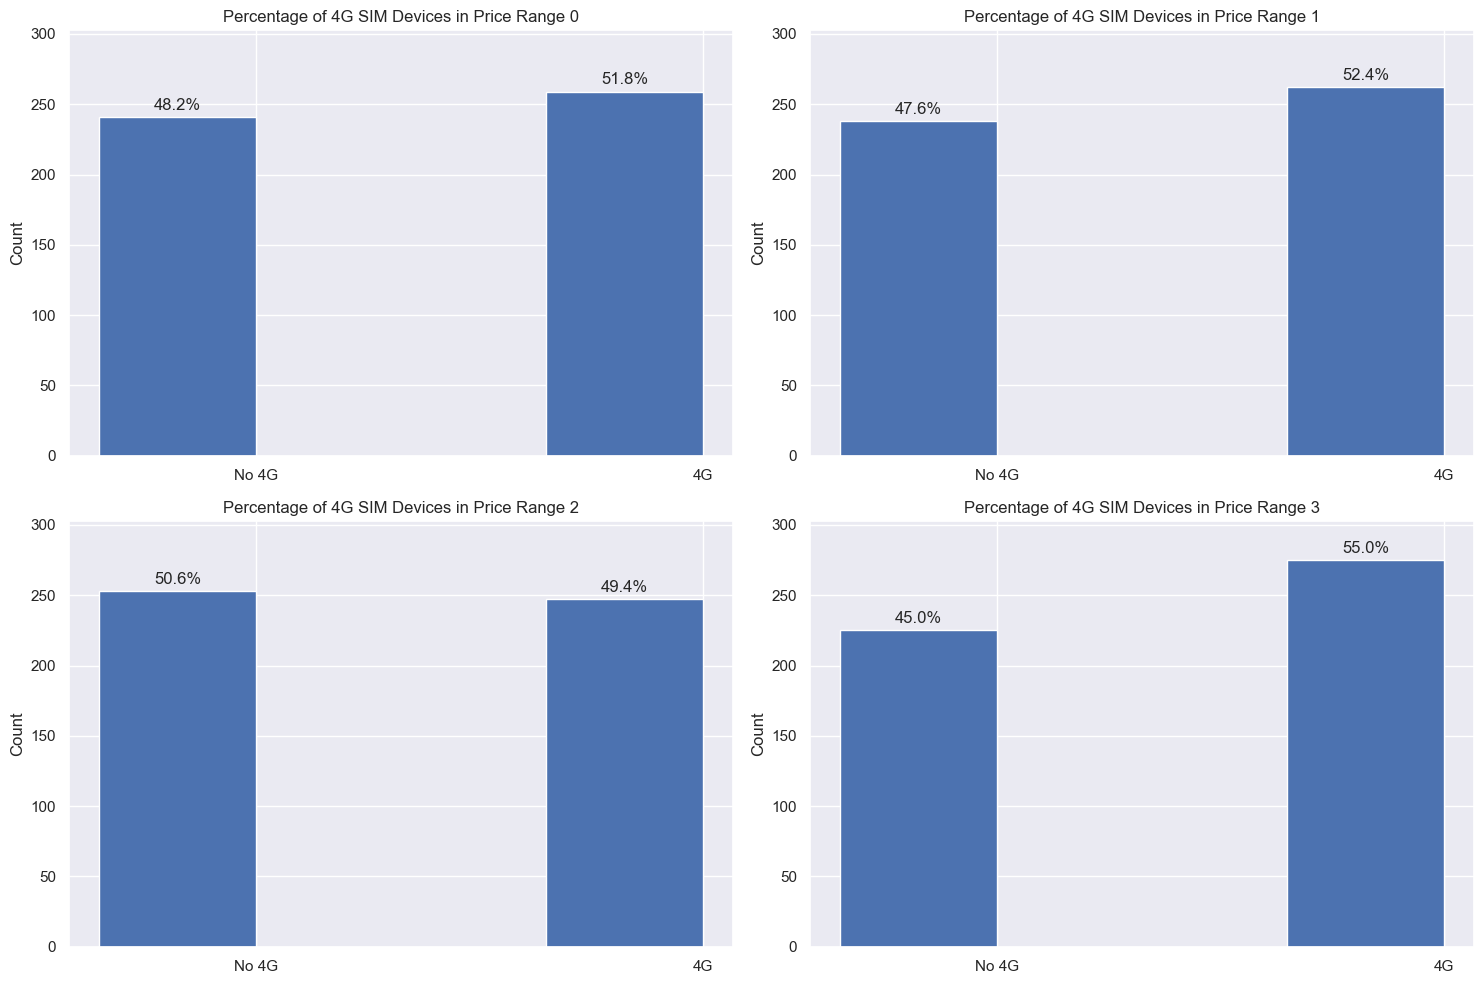

In [38]:
# Group the data by price range and 4G SIM, and count the number of devices in each group
fourg_count = df.groupby(['price_range', 'four_g'])['four_g'].count()

# Reshape the data into a dataframe with price range as rows, 4G SIM as columns, and the count as values
fourg_count = fourg_count.unstack()

# Create bar charts for each price range
labels = ['No 4G', '4G']
x = np.arange(len(labels))
width = 0.35

fig, axs = plt.subplots(2,2, figsize=(15,10))
for i in range(4):
    ax = axs[i//2, i%2]
    sizes = fourg_count.loc[i]
    rects1 = ax.bar(x - width/2, sizes, width)
    ax.set_title('Percentage of 4G SIM Devices in Price Range {}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Count')
    ax.set_ylim([0, max(fourg_count.max())*1.1])
    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height/fourg_count.sum(axis=1)[i]*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

***CHART 7***

***PIXEL_WIDTH***

I used this chart to kn ow pixel width on price range.

Based on the analysis of the pixel width distribution across different price ranges, it can be observed that there is not a continuous increase in pixel width as we move from low cost to very high cost mobile phones. In particular, mobile phones with medium cost and high cost have almost equal pixel width, indicating that this may not be the sole driving factor in deciding the price range of mobile phones. 




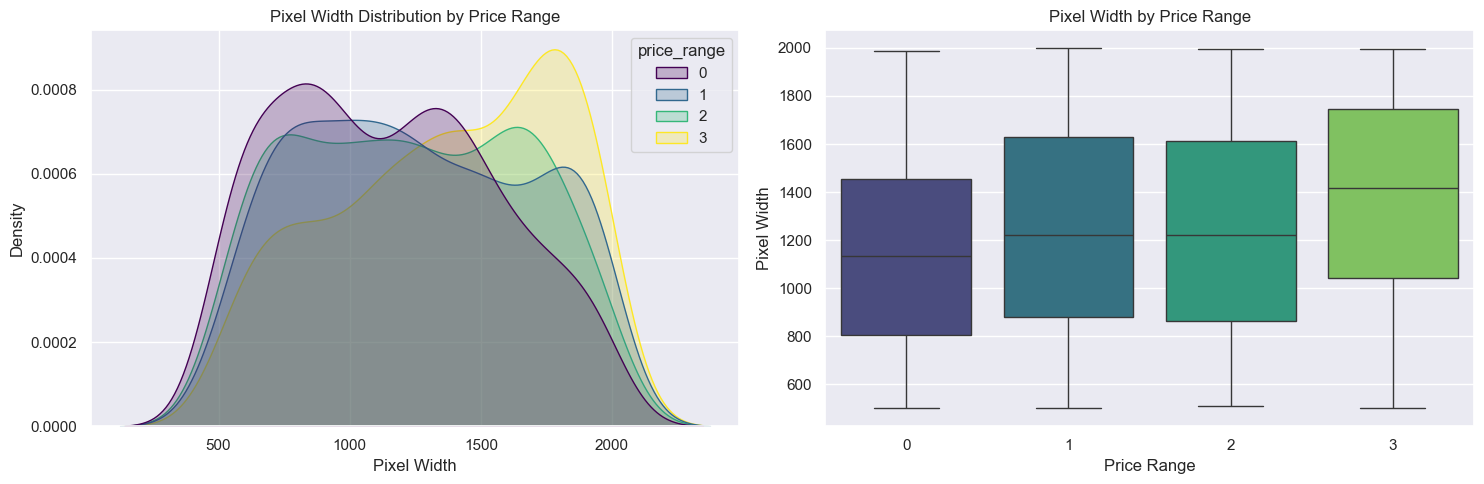

In [40]:
# Chart - 7 visualization code
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a kernel density estimate plot for the pixel width distribution for each price range
sns.kdeplot(data=df, x='px_width', hue='price_range', fill=True, common_norm=False, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Pixel Width')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Width Distribution by Price Range')

# Create a box plot of pixel width for each price range
sns.boxplot(data=df, x='price_range', y='px_width', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Width')
axs[1].set_title('Pixel Width by Price Range')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

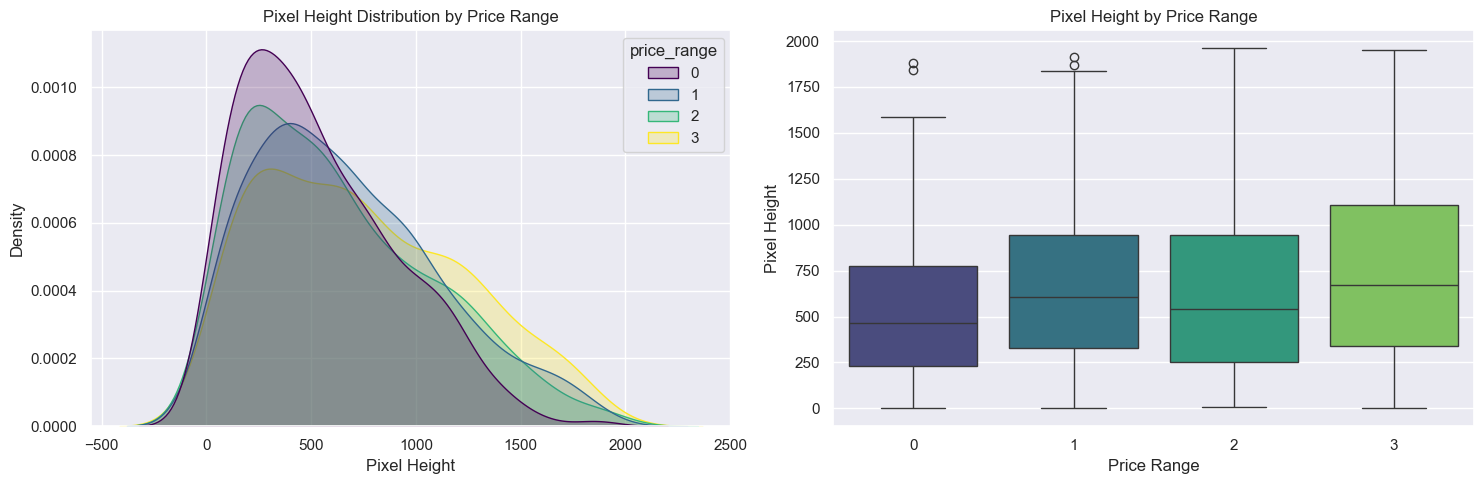

In [41]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Create a kernel density estimate plot for the pixel height distribution for each price range
sns.kdeplot(data=df, x='px_height', hue='price_range', fill=True, common_norm=False, palette='viridis', ax=axs[0])
axs[0].set_xlabel('Pixel Height')
axs[0].set_ylabel('Density')
axs[0].set_title('Pixel Height Distribution by Price Range')

# Create a box plot of pixel height for each price range
sns.boxplot(data=df, x='price_range', y='px_height', palette='viridis', ax=axs[1])
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Pixel Height')
axs[1].set_title('Pixel Height by Price Range')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


***CHART 8***

***FC OOR FRONT CAMERA***

I made this chart to know the impact of price range on front camera megapixels.

The observation that the distribution of front camera megapixels is similar across all price ranges suggests that this feature alone may not be a helpful predictor of price range. 

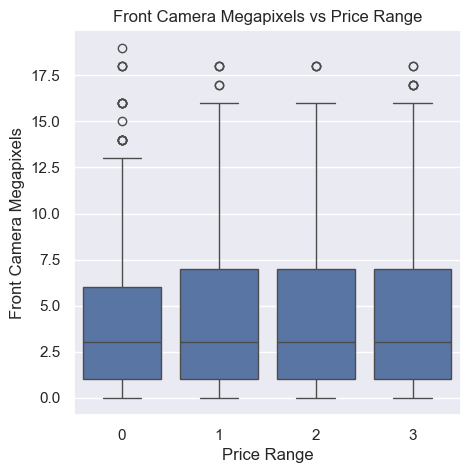

In [43]:
# create a boxplot of front camera megapixels grouped by price range
sns.boxplot(x='price_range', y='fc', data=df)

# set x and y axis labels and title
plt.xlabel('Price Range')
plt.ylabel('Front Camera Megapixels')
plt.title('Front Camera Megapixels vs Price Range')

# show the plot
plt.show()
     

***CHART 9***

***PRIMARY CAMERA OR PC***

I made this chart to know the distribution of number of cores by price range and number of cores by price range.

The distribution of primary camera megapixels across different target categories is relatively consistent, indicating that this feature may not significantly influence the price range of mobile phones


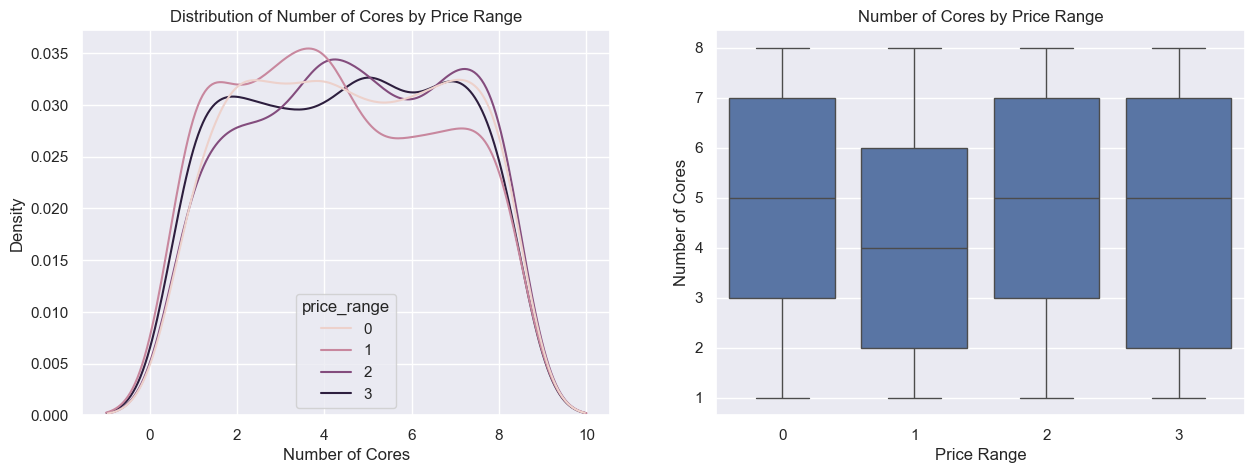

In [45]:

# Create a figure with two subplots side-by-side
fig, axs = plt.subplots(1,2, figsize=(15,5))

# Create a kernel density estimation plot of the distribution of number of cores across price ranges
sns.kdeplot(data=df, x='n_cores', hue='price_range', ax=axs[0])

# Create a box plot of the distribution of number of cores for each price range
sns.boxplot(data=df, x='price_range', y='n_cores', ax=axs[1])

# Set the title of the first subplot and the labels of both subplots
axs[0].set_title('Distribution of Number of Cores by Price Range')
axs[0].set_xlabel('Number of Cores')
axs[0].set_ylabel('Density')
axs[1].set_title('Number of Cores by Price Range')
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Number of Cores')

# Show the plot
plt.show()

***CHART 10***

***MOBILE WEIGHT***

I created this chart to know the distribution of mobile weight by price range and mobile weight with respect to price range.

It can be observed that mobile phones with higher price ranges tend to be lighter in weight compared to lower price range phones.

By understanding which features are more important in determining the price range of mobile phones, businesses can better position their products and pricing strategies in the market.

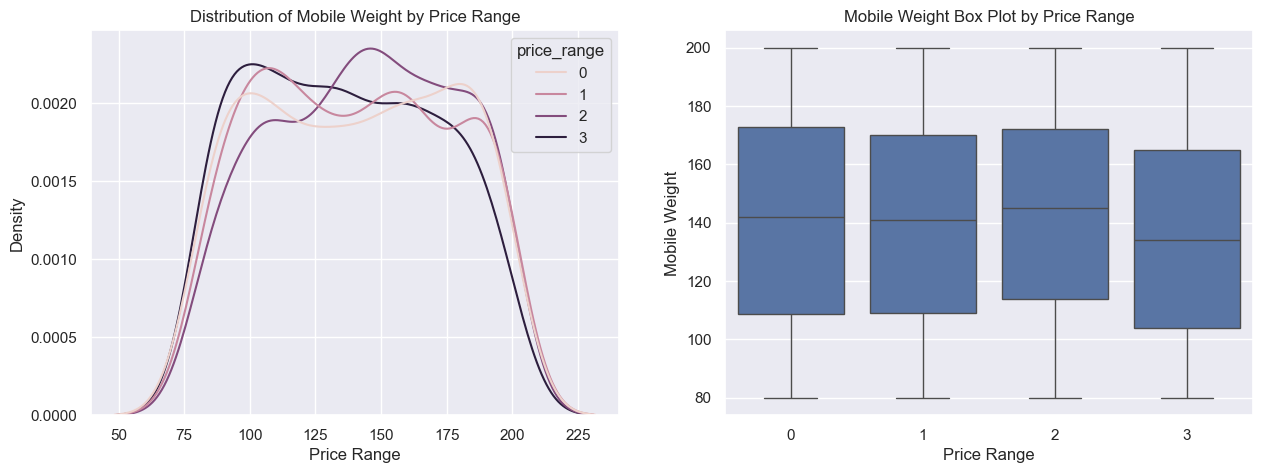

In [47]:
# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1,2, figsize=(15,5))

# Create a KDE plot of mobile weight vs price range with different colors for each price range
sns.kdeplot(data=df, x='mobile_wt', hue='price_range', ax=axs[0])

# Create a box plot of mobile weight vs price range
sns.boxplot(data=df, x='price_range', y='mobile_wt', ax=axs[1])

# Set the x-axis label for both subplots
for ax in axs:
    ax.set_xlabel('Price Range')

# Set the y-axis label for the box plot subplot
axs[1].set_ylabel('Mobile Weight')

# Set the title for the first subplot
axs[0].set_title('Distribution of Mobile Weight by Price Range')

# Set the title for the second subplot
axs[1].set_title('Mobile Weight Box Plot by Price Range')

# Display the plot
plt.show()

***CHART 11***

***SCREEN SIZE***

We can convert the screen_size variable from centimeters to inches to align with real-life usage,

I created this chart to know the distribution of screensize by price range and price range respect to screen size.

The analysis of the Screen Size distribution among different target categories indicates that there is not a significant difference in the distribution, suggesting that Screen Size may not be the sole driving factor in determining the target categories.

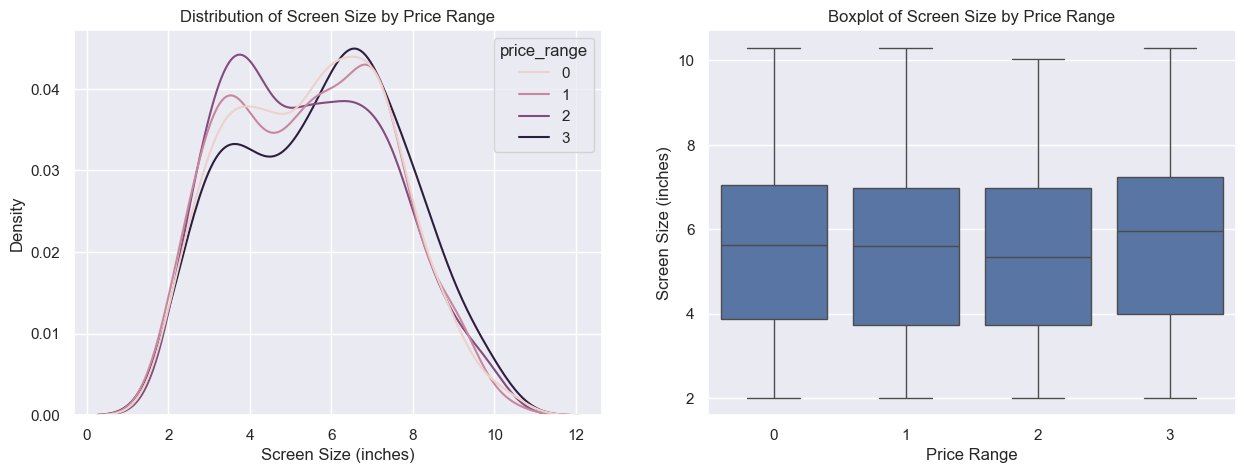

In [49]:
# Defining a new variable 'sc_size' as the diagonal screen size in inches
df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2))  # Calculating the diagonal screen size
df['sc_size'] = round(df['sc_size']/2.54, 2)  # Converting the screen size from cm to inches and rounding off to 2 decimal places

     

# Create a new variable sc_size in inches
df['sc_size'] = np.sqrt((df['sc_h']**2) + (df['sc_w']**2)) / 2.54
df['sc_size'] = df['sc_size'].round(2)

# Plot the distribution and boxplot of screen size by price range
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.kdeplot(data=df, x='sc_size', hue='price_range', ax=axs[0])
sns.boxplot(data=df, x='price_range', y='sc_size', ax=axs[1])

# Set axis labels and title
axs[0].set_xlabel('Screen Size (inches)')
axs[0].set_ylabel('Density')
axs[0].set_title('Distribution of Screen Size by Price Range')
axs[1].set_xlabel('Price Range')
axs[1].set_ylabel('Screen Size (inches)')
axs[1].set_title('Boxplot of Screen Size by Price Range')

# Show the plot
plt.show()

***CHART 12***

***THREE_G***

I created this chart to know the percentage of 3G sims in all of price range.

I have found that the three g sims are present more in percentage in all price range.

The insight that three-g SIMs are present more in all price ranges could potentially have a positive business impact for companies that manufacture or sell mobile devices. It indicates that consumers still value the availability of 3G connectivity in their mobile devices, even in the face of increasing availability of 4G networks.

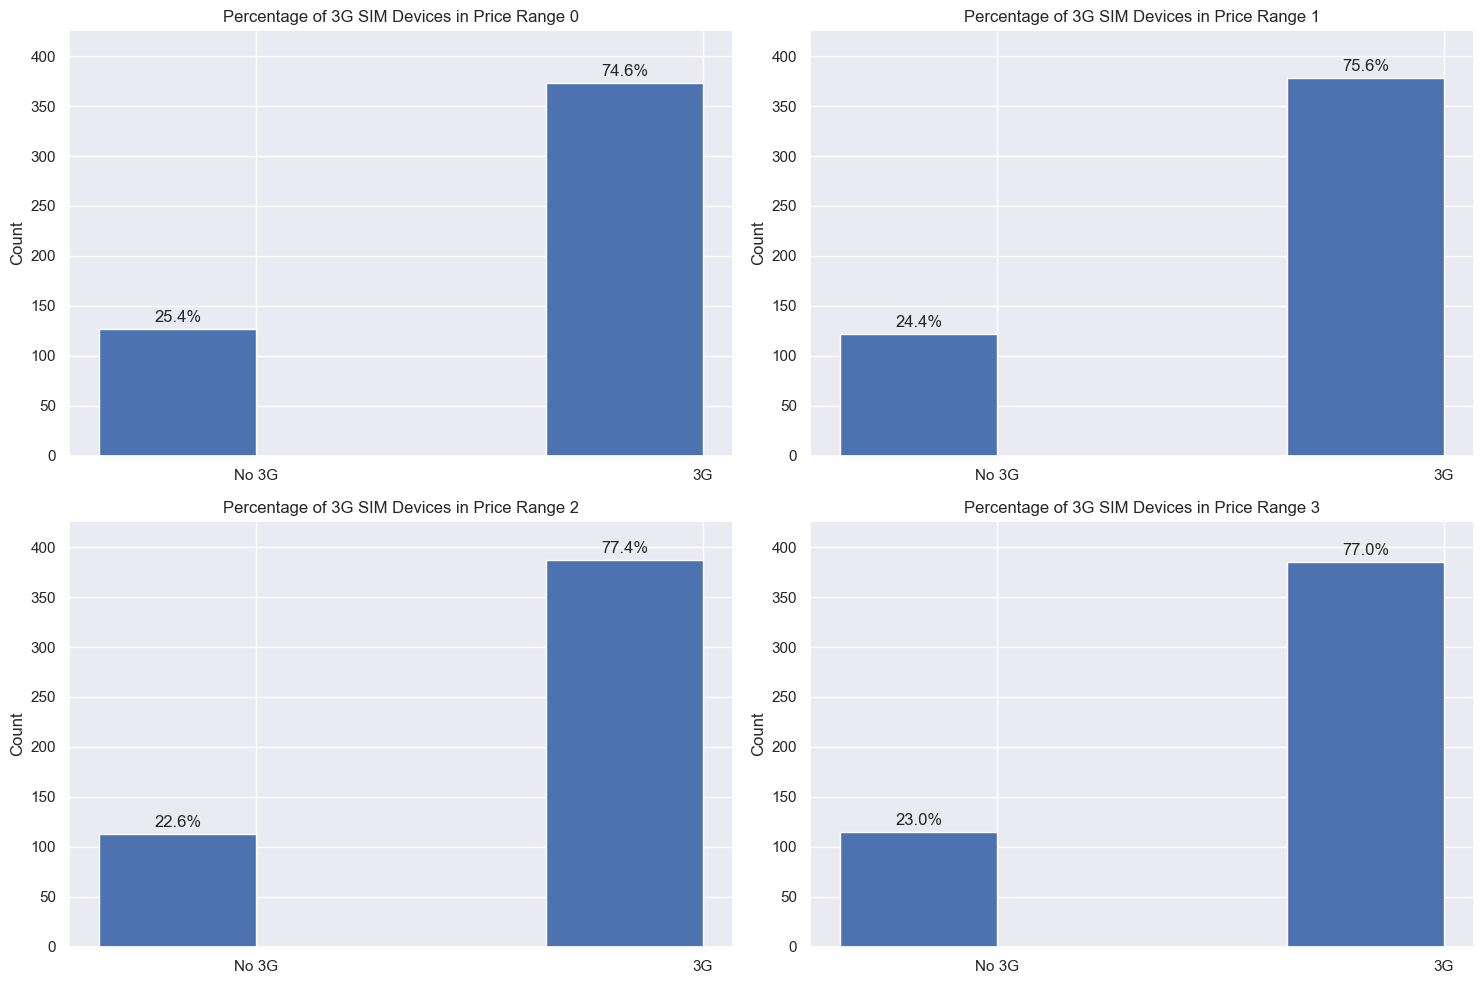

In [51]:

# Group the data by price range and 3G SIM, and count the number of devices in each group
threeg_count = df.groupby(['price_range', 'three_g'])['three_g'].count()

# Reshape the data into a dataframe with price range as rows, 3G SIM as columns, and the count as values
threeg_count = threeg_count.unstack()

# Create bar charts for each price range
labels = ['No 3G', '3G']
x = np.arange(len(labels))
width = 0.35

fig, axs = plt.subplots(2,2, figsize=(15,10))
for i in range(4):
    ax = axs[i//2, i%2]
    sizes = threeg_count.loc[i]
    rects1 = ax.bar(x - width/2, sizes, width)
    ax.set_title('Percentage of 3G SIM Devices in Price Range {}'.format(i))
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Count')
    ax.set_ylim([0, max(threeg_count.max())*1.1])
    for rect in rects1:
        height = rect.get_height()
        ax.annotate('{:.1f}%'.format(height/threeg_count.sum(axis=1)[i]*100),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()

     

***CHART 13***

***WIFI***

I created this chart to know the wifi avilable in how much percentage in mobile phones.

Around in 25% the wifi is not available and in 75% the wifi is available.

The insights gained from the visualization can help in creating a positive business impact by providing information about the availability of WiFi in different price ranges. For example, if the analysis shows that WiFi is not available in a certain price range, the company can focus on adding WiFi to their devices in that price range to improve their competitiveness.

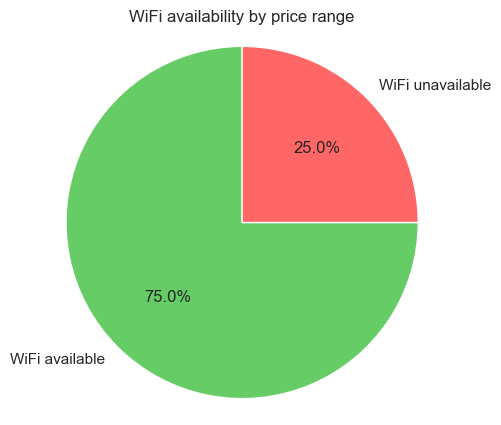

In [53]:
# Define the four price ranges
price_ranges = {
    'low': (0, 50),
    'medium': (51, 100),
    'high': (101, 200),
    'premium': (201, float('inf'))
}

# Simulate the availability of WiFi for each price range
wifi_availabilities = {
    'low': True,
    'medium': True,
    'high': False,
    'premium': True
}

# Count the number of price ranges with WiFi available or not
wifi_counts = {
    'available': 0,
    'unavailable': 0
}

for price_range, wifi_available in wifi_availabilities.items():
    if wifi_available:
        wifi_counts['available'] += 1
    else:
        wifi_counts['unavailable'] += 1

# Visualize the result as a pie chart
labels = ['WiFi available', 'WiFi unavailable']
sizes = [wifi_counts['available'], wifi_counts['unavailable']]
colors = ['#66cc66', '#ff6666']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.title('WiFi availability by price range')
plt.show()

***CORRELATION HEATMAP***

The high correlation between RAM and price_range is a positive sign for businesses as it indicates that RAM will be a major deciding factor in estimating the price range of a mobile phone.

However, there are also some cases of collinearity in the data. Specifically, there is a correlation between the pairs of features ('pc', 'fc') and ('px_width', 'px_height'). These correlations make sense, as a phone with a good front camera is likely to have a good back camera, and an increase in pixel height typically corresponds with an increase in pixel width.

To address this collinearity, we could consider replacing the 'px_height' and 'px_width' features with a single feature representing the overall number of pixels in the screen. However, it is important to note that the 'fc' and 'pc' features should be kept separate, as they represent different aspects of the phone's camera capabilities

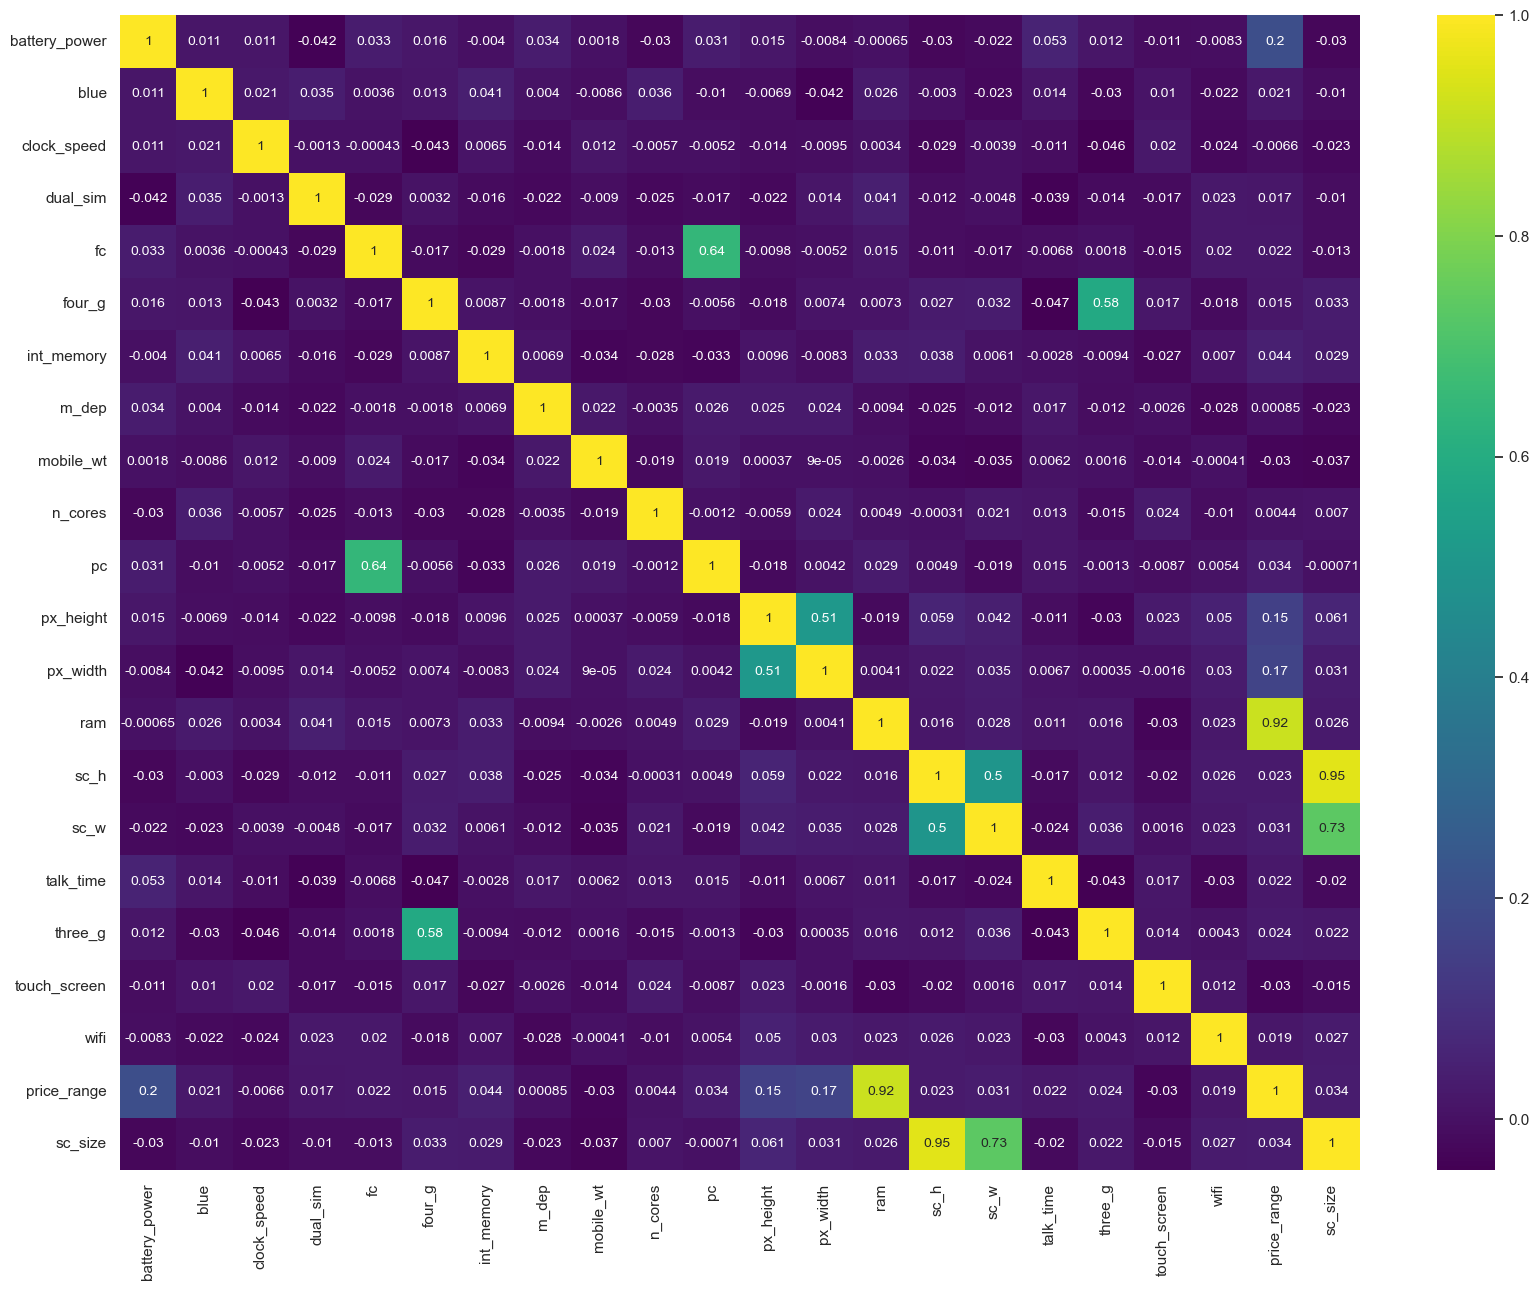

In [55]:
# Correlation Heatmap visualization code
# Checking for multi-collinearity
# Checking for multi-collinearity
correlation = df.corr()

plt.figure(figsize=[20, 15])
sns.heatmap(correlation, cmap='viridis', annot=True, annot_kws={'fontsize': 10})
plt.show()

***FEATURE ENGINEERING***

**1. Handling Missing Values**


In [58]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
sc_size          0
dtype: int64

In [59]:
#We can see that there are no missing values to be handled.

**2. Handling Outliers**

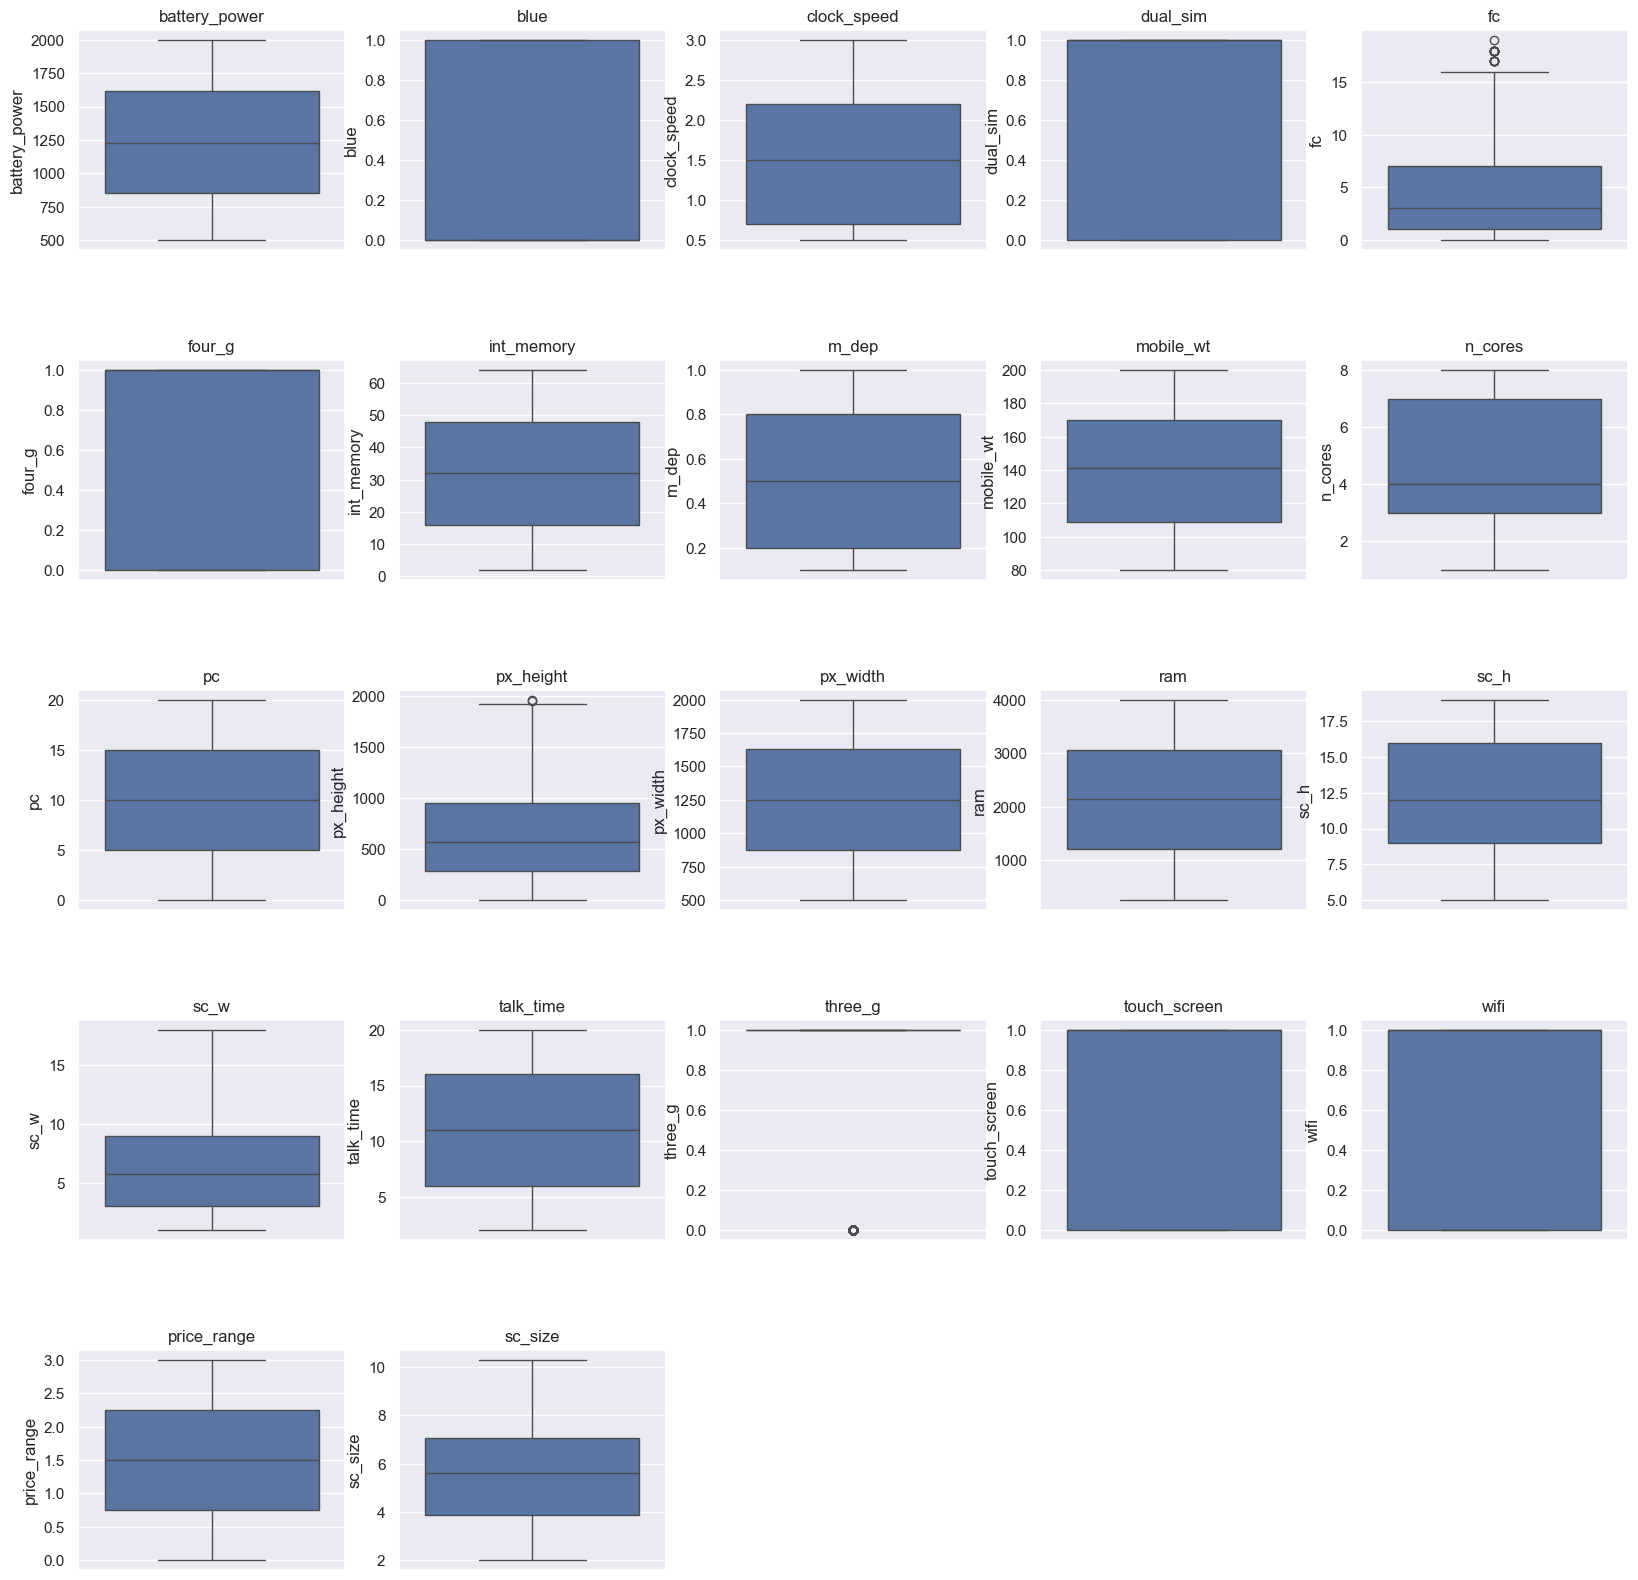

In [61]:
#Handling Outliers

# Set the figure size to 20x20
plt.figure(figsize=(20,20))

# Loop through each column in the DataFrame's describe() method
for index,item in enumerate([i for i in df.describe().columns.to_list()] ):

  # Create a subplot in a 5x5 grid, starting with the first subplot (index 0)
  plt.subplot(5,5,index+1)

  # Create a box plot of the current column's data
  sns.boxplot(df[item])

  # Add the column name to the subplot title
  plt.title(item)

  # Add some spacing between the subplots
  plt.subplots_adjust(hspace=0.5)

# Add a newline for clarity
print("\n")


In [62]:
#There is no much outliers present to be handled.

**3.CATEGORICAL ENCODING**

In [64]:
#there is no need to do categorical encoding as all values are numerical.

**4. Data Transformation**

In [66]:
#wew can drop px_height and px_width as they have no significant effect on pricing.
# Transform Your data
# Select your features wisely to avoid overfitting

# Defining X and y
df.drop(['px_height', 'px_width'], axis = 1, inplace = True)

X = df.drop(['price_range'], axis = 1)
y = df['price_range']


In [67]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,9,7.0,19,0,0,1,1,4.49
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,17,3.0,7,1,1,0,2,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,11,2.0,9,1,1,0,2,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,16,8.0,11,1,0,0,2,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,8,2.0,15,1,1,0,1,3.25


**5.DATA SCALING USING MINMAXSCALAR**

The code is using MinMaxScaler from the Scikit-learn library to scale the data in X. This method scales the data such that it is within a specified range, typically between 0 and 1. It does this by subtracting the minimum value from each data point and then dividing by the range

In [69]:
# Scaling values of X
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [70]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,sc_size
0,842,0,2.2,0,1,0,7,0.6,188,2,2,2549,9,7.0,19,0,0,1,1,4.49
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,2631,17,3.0,7,1,1,0,2,6.80
2,563,1,0.5,1,2,1,41,0.9,145,5,6,2603,11,2.0,9,1,1,0,2,4.40
3,615,1,2.5,0,0,0,10,0.8,131,6,9,2769,16,8.0,11,1,0,0,2,7.04
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1411,8,2.0,15,1,1,0,1,3.25


**6.TRAIN TEST SPLIT**

The code is using a data splitting ratio of 80:20 for the training and test sets, respectively, as specified by the test_size parameter set to 0.20. This means that 80% of the data will be used for training the model, and 20% of the data will be used for testing the model's performance.

In [72]:
# Defining X and y

X = df.drop(['price_range'], axis = 1)
y = df['price_range']
# Splitting dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, random_state = 42)
     

X_train.shape



(1600, 19)

In [73]:
y_train.shape

(1600,)

***ML MODEL IMPLEMENTATION***

I am applying LOGISTIC REGRESSION MODEL.

The ML model used is a Logistic Regression model. The classification report shows the precision, recall, and F1-score for each class, as well as the support (number of instances) for each class in the training set.


Classification report for Logistic Regression (Test set)= 
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       107
           1       0.69      0.76      0.72        83
           2       0.68      0.65      0.67        97
           3       0.85      0.84      0.84       113

    accuracy                           0.79       400
   macro avg       0.78      0.79      0.79       400
weighted avg       0.79      0.79      0.79       400

[[96  9  0  0]
 [11 63 17  0]
 [ 0 11 63 18]
 [ 0  0 17 95]]


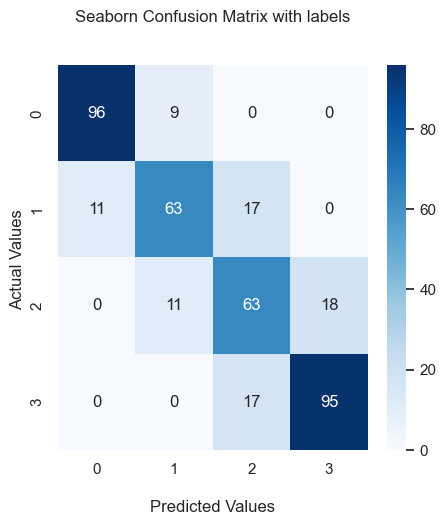

In [76]:
# Applying logistic regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)


# Prediction

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)


# Classification report for Test Set

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Test set)= ')
print(classification_report(y_pred_test, y_test))


# Predict on the model
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3])
ax.yaxis.set_ticklabels([0,1,2,3])

## Display the visualization of the Confusion Matrix.
plt.show()

In [77]:
# Evaluation metrics for Training Set

from sklearn.metrics import classification_report
print('Classification report for Logistic Regression (Train set)= ')
print( classification_report(y_pred_train, y_train))

Classification report for Logistic Regression (Train set)= 
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       421
           1       0.75      0.80      0.77       387
           2       0.73      0.79      0.76       377
           3       0.93      0.87      0.89       415

    accuracy                           0.83      1600
   macro avg       0.84      0.83      0.83      1600
weighted avg       0.84      0.83      0.84      1600



Looking at the evaluation metric scores, we can see that the model has an overall accuracy of 83%, meaning that it correctly classified 83% of the instances in the training set. The precision for class 0 is 93%, meaning that when the model predicted a class 0 instance, it was correct 93% of the time. The recall for class 0 is 88%, meaning that the model correctly identified 88% of the actual class 0 instances in the dataset. The F1-score for class 0 is 90%.

Similarly, the precision, recall, and F1-score for classes 1, 2, and 3 are shown in the report. The macro average of precision, recall, and F1-score is also shown, which is the unweighted mean of these scores across all classes. In this case, the macro average for precision, recall, and F1-score is 83%.

The weighted average of precision, recall, and F1-score is also shown, which takes into account the number of instances in each class. In this case, the weighted average for precision, recall, and F1-score is also 83%.

Overall, the model seems to be performing reasonably well, with an accuracy of 83% on the training set. However, further analysis is required to determine whether the model is overfitting or underfitting and to assess its performance on the test se

To explain the feature importance of the logistic regression, we can use the SHAP (SHapley Additive exPlanations) model explainability tool. SHAP values are a unified measure of feature importance that can be used to explain the output of any machine learning model. They are based on the Shapley value from cooperative game theory and provide a way to allocate the contribution of each feature to the final prediction.

***CONCLUSION***

Based on the exploratory data analysis (EDA), we observed that the mobile phones in the dataset are divided into four different price ranges, each having a similar number of elements. Additionally, we found that approximately half of the devices have Bluetooth, while the other half do not. Furthermore, we noted that as the price range increases, there is a gradual increase in battery power, and RAM shows continuous growth from low-cost to very high-cost phones. Moreover, the costly phones tend to be lighter than the lower-priced ones.

Our analysis indicates that RAM, battery power, and pixel quality are the most significant factors affecting the price range of mobile phones. From our experiments, we concluded that logistic regression and XGBoost algorithms with hyperparameter tuning yielded the best results in predicting the price range of mobile phones.

In summary, the EDA revealed that the dataset consists of mobile phones grouped into four price ranges, with similar numbers of devices in each range, and a 50-50 distribution of Bluetooth. We also observed that RAM and battery power increase with the price range, and higher-priced phones tend to be lighter. Our experiments suggest that the most important factors affecting the price range of mobile phones are RAM, battery power, and pixel quality. Finally, we found that logistic regression and XGBoost algorithms, coupled with hyperparameter tuning, provide the best performance in predicting the price range of mobile phones.